<a href="https://colab.research.google.com/github/jonathanfranco1/MNIST-Digit-Classifier/blob/main/MNIST_Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#function
def train_test_rmse(x,y):
    x = Iris_data[x]
    y = Iris_data[y]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(accuracy_score(y_test, y_pred))  # or you can save it in variable and return it
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

np.random.seed(0)

# Data

In [9]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

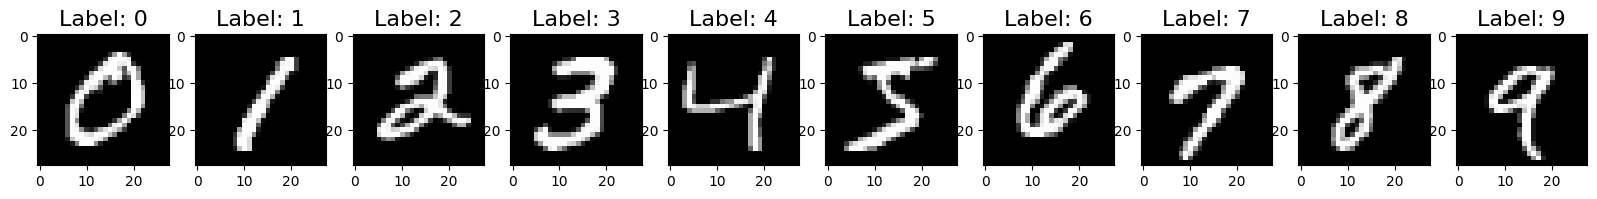

In [11]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [12]:
for i in range(10):
  print(y_train[i])


5
0
4
1
9
2
1
3
1
4


In [13]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [15]:
# Normalize Data

x_train = x_train / 255.0
x_test = x_test / 255.0

In [16]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully Connected Neural Network

In [17]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train

In [18]:
batch_size = 512
epochs = 10
model.fit(x=x_train,y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 13ms/step - loss: 0.5910 - accuracy: 0.8288
Epoch 2/10
118/118 [==============================] - 1s 7ms/step - loss: 0.2268 - accuracy: 0.9332
Epoch 3/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1668 - accuracy: 0.9505
Epoch 4/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1320 - accuracy: 0.9599
Epoch 5/10
118/118 [==============================] - 1s 7ms/step - loss: 0.1093 - accuracy: 0.9674
Epoch 6/10
118/118 [==============================] - 1s 7ms/step - loss: 0.0921 - accuracy: 0.9722
Epoch 7/10
 63/118 [===============>..............] - ETA: 0s - loss: 0.0807 - accuracy: 0.9758

KeyboardInterrupt: ignored

In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}, Test Accuracy: {}'.format(test_loss, test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9741
Test Loss: 0.08241619914770126, Test Accuracy: 0.9740999937057495


In [20]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 1ms/step
[[2.7564874e-06 7.8694293e-06 1.2421038e-04 ... 9.9931961e-01
  2.0540374e-05 6.2398736e-05]
 [2.6416205e-07 5.2574748e-04 9.9942100e-01 ... 9.7568332e-08
  5.1378092e-06 1.9961689e-11]
 [1.2534461e-04 9.9342215e-01 6.5744744e-04 ... 3.3167673e-03
  4.7356333e-04 1.1499613e-04]
 ...
 [6.1636719e-08 9.3641972e-07 6.8033948e-08 ... 2.0995021e-05
  2.6814769e-06 4.1241528e-05]
 [3.1032944e-06 8.7669360e-07 6.8798823e-07 ... 1.5198641e-06
  1.1825047e-04 4.7030571e-08]
 [1.2956635e-06 6.0468807e-08 5.1791386e-07 ... 2.5357592e-09
  4.6057377e-08 8.7088994e-09]]
[7 2 1 ... 4 5 6]


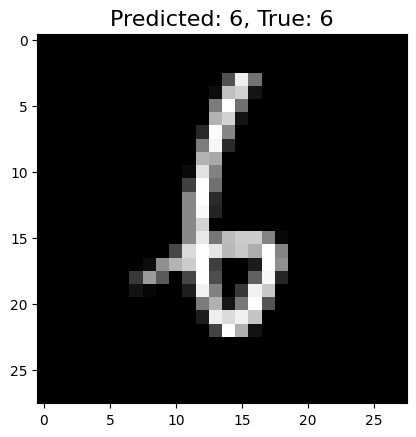

In [21]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title('Predicted: {}, True: {}'.format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28,28),cmap='gray')

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

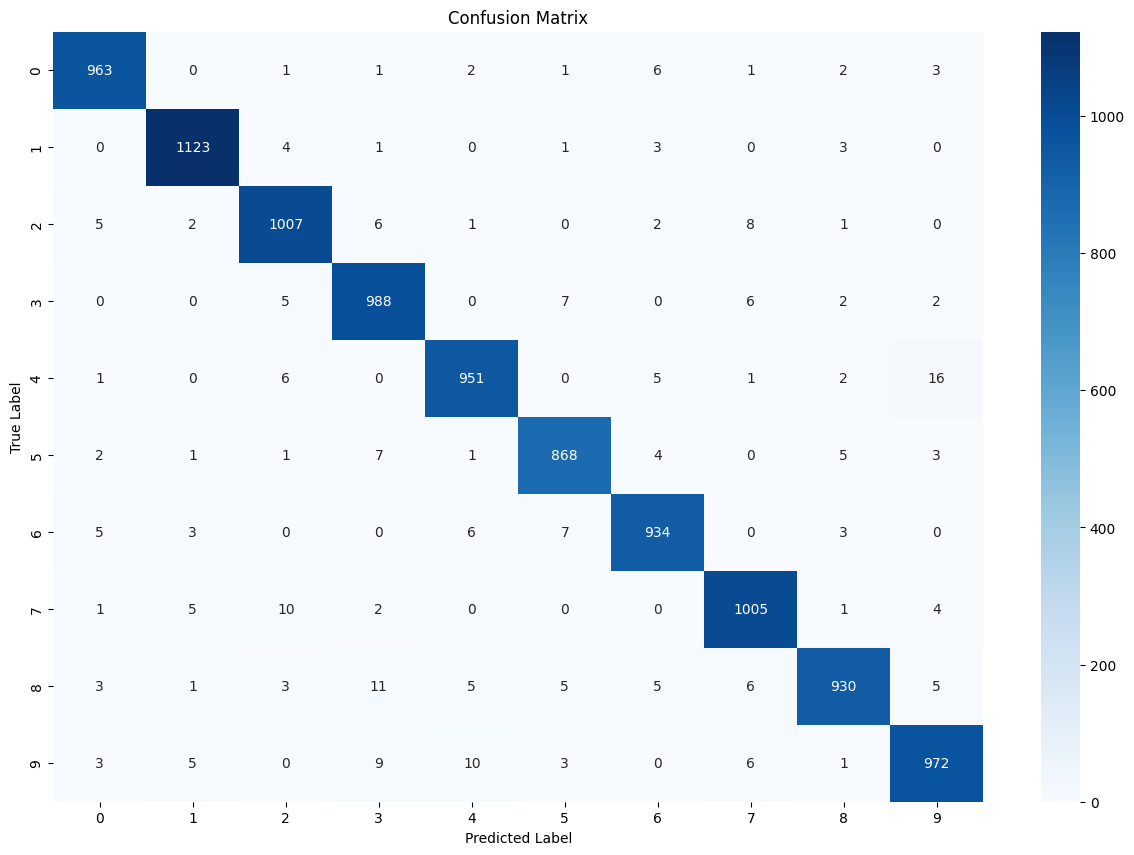

In [24]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')




# Investigating Errors

In [25]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [27]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis =1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:]

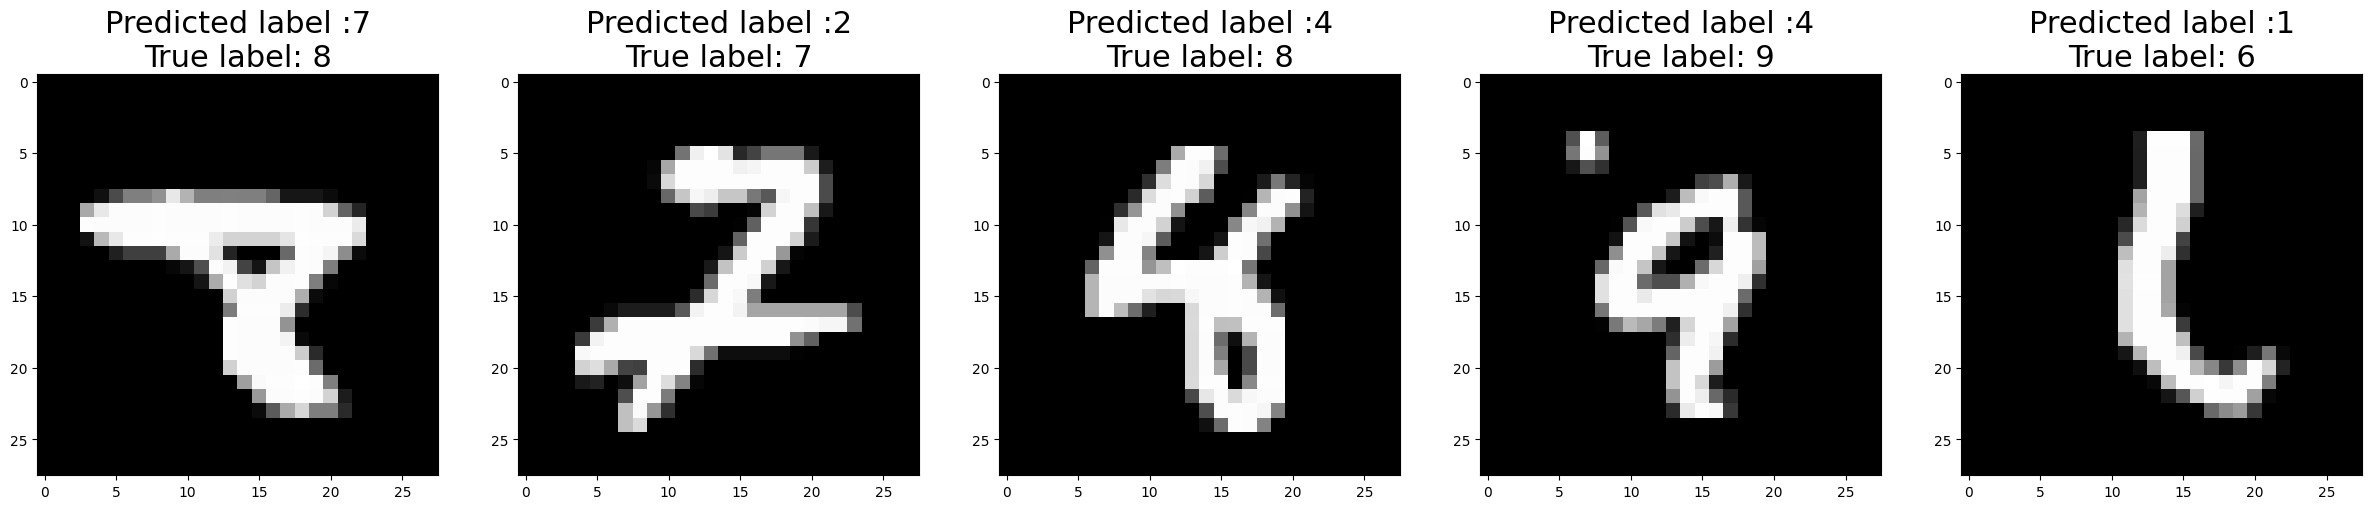

In [30]:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title('Predicted label :{}\nTrue label: {}'.format(y_p, y_t), fontsize=22)